In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
df = pd.read_csv('netfilx.csv', encoding='latin-1')

In [5]:
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


In [19]:
df = df.drop_duplicates() 
df.duplicated().values.any()

False

In [10]:
df = df.fillna(method="ffill")
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,82.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,74.0,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,74.0,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,74.0,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,74.0,82


In [15]:
pd.isnull(df).any  # Checking for Null Values

<bound method DataFrame.any of      title  rating  ratingLevel  ratingDescription  release year  \
0    False   False        False              False         False   
1    False   False        False              False         False   
2    False   False        False              False         False   
3    False   False        False              False         False   
4    False   False        False              False         False   
..     ...     ...          ...                ...           ...   
989  False   False        False              False         False   
993  False   False        False              False         False   
994  False   False        False              False         False   
997  False   False        False              False         False   
998  False   False        False              False         False   

     user rating score  user rating size  
0                False             False  
1                False             False  
2                False 

# Exploratory Data Analysis

In [11]:
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,82.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [12]:
df.tail()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
989,Russell Madness,PG,some rude humor and sports action,60,2015,74.0,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,74.0,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,74.0,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,74.0,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,74.0,82


In [13]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,500.000000,500.000000,500.00000,500.000000
mean,68.754000,2010.976000,78.35400,80.972000
std,31.505089,7.829305,12.47204,0.998604
min,10.000000,1940.000000,55.00000,80.000000
25%,41.000000,2009.000000,70.00000,80.000000
50%,70.000000,2014.000000,79.00000,80.000000
75%,90.000000,2016.000000,90.00000,82.000000
max,124.000000,2017.000000,99.00000,82.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        500 non-null    object 
 3   ratingDescription  500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  500 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 51.2+ KB


In [17]:
df.shape

(500, 7)

In [18]:
df.columns

Index(['title', 'rating', 'ratingLevel', 'ratingDescription', 'release year',
       'user rating score', 'user rating size'],
      dtype='object')

## Visualizing Data

### How  many shows are there in Netflix Shows Dataset? 

In [23]:
df['title'].count()

500

We are analyzing 500 netflix shows in this dataset across 7 features

### How many Netflix shows are produced each year?

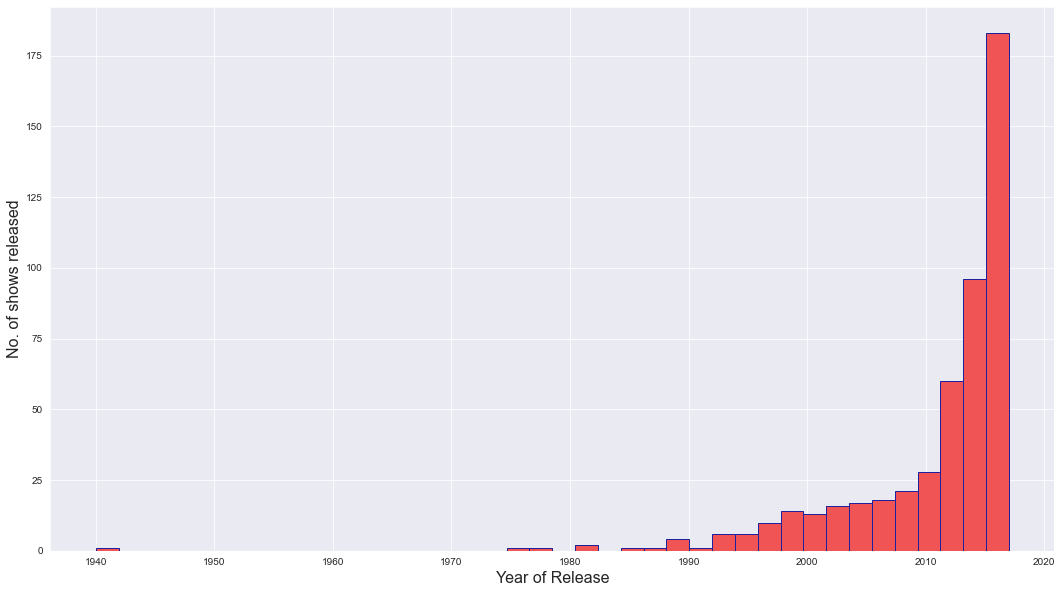

In [27]:
plt.figure(figsize=(18,10))
plt.hist(df['release year'], ec='#21209c', bins = 40, color='#f05454')
plt.xlabel('Year of Release', fontsize=16)
plt.ylabel('No. of shows released', fontsize=16)
plt.show()